#Conexão com postgres e Relatorios do Sistema




#Instalando bibliotecas de acesso ao postgres, manipulação de dados e gráficos

In [ ]:
#!pip install --user psycopg2-binary
#!pip install --user seaborn
#!pip install --user pandas

#Importando bibliotecas e realizando configurações

In [ ]:
import psycopg2
import pandas as pd
conn = psycopg2.connect(host="ruby.db.elephantsql.com",database ="zbhwctjp",user ="zbhwctjp", password ="KpKFW6sP3irBObgJf_YJtiCTqyfd-VA2")

import seaborn as sns
import matplotlib.pyplot as plt

# Relatórios

Relatório 1

Objetivo: Obter relatório que mostre o nome de cada usuário e a quantidade total de transações que o mesmo realizou, incluindo todos os tipos de transações.

Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""select pessoa.nome, count(cpf_pessoa) as qtd_transacao from transacao 
                            inner join pessoa 
                            on (transacao.cpf_pessoa = pessoa.cpf) 
                            group by pessoa.nome 
                            order by pessoa.nome""", conn)
res

,nome,qtd_transacao
0,Alessadra Silva,3
1,Ana Gomes,4
2,Ana Sofia,1
3,Beatriz Souza Alves,2
4,Bernardo Batista,2
5,Carla Santos,3
6,Fabio Nunes,9
7,Fernando Magalhaes,1
8,Isaias Rangel,1
9,João Almeida,4


Text(0.5, 0, 'qtd_transacao')

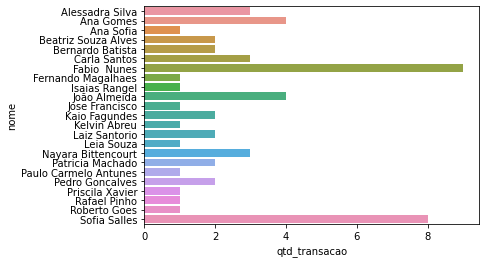

In [ ]:
ax = sns.barplot(x='qtd_transacao', y='nome', data=res)
ax.set_xlabel('qtd_transacao')

Relatório 2

Objetivo: Obter relatório que mostre a soma total de valores movimentados em todas as transações e a soma total de gastos de acordo com o estado, considera-se gastos as transações que pertencem aos tipos 1  e 2, saques e despesas respectivamente. 

Código para obtenção do resultado:

In [ ]:
estados = pd.read_sql_query("""select endereco.estado, sum(valor) as "soma total", sum(case when transacao.tipo = 1 or transacao.tipo = 2 then transacao.valor end) as "valor de gastos" from transacao 
                            inner join endereco 
                            on (transacao.cpf_pessoa = endereco.cpf_pessoa) 
                            group by endereco.estado 
                            order by endereco.estado""", conn) 
estados

,estado,soma total,valor de gastos
0,AC,2200.00,2200.00
1,BA,5350.00,4000.00
2,DF,7600.00,7600.00
3,ES,117680.99,25222.99
4,PE,16750.00,850.00
5,PR,9000.00,2300.00
6,RJ,30550.00,23050.00
7,SC,27283.00,14550.00
8,SP,16642.00,1842.00


No handles with labels found to put in legend.


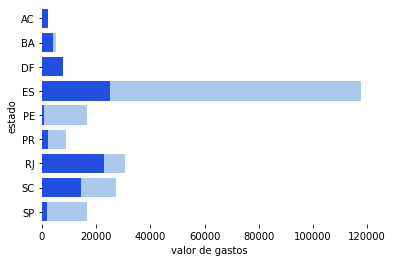

In [ ]:
sns.set_color_codes("pastel")
sns.barplot(x="soma total", y="estado", data=estados,
            label="Soma Total", color="b")


sns.set_color_codes("bright")
sns.barplot(x="valor de gastos", y="estado", data=estados,
            label="Valor Gasto em Despesas", color="b")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Valor Movimentado por Estado")
sns.despine(left=True, bottom=True)

Relatório 3

Objetivo: Obter relatório que mostre o valor total de cada tipo de transação de acordo com meses e o ano de 2020.

Código para obtenção do resultado:

In [ ]:
res =pd.read_sql_query("""select (select extract('year' from data_operacao)) as "ano",(select extract('month' from data_operacao)) as "mes", tipo.descricao_tipo as "tipo" , sum(valor) as "valor total" from transacao 
                        inner join
                        tipo on(tipo = tipo.cod_tipo and (select extract('year' from data_operacao))='2020')
                        group by mes,ano,tipo.descricao_tipo
                        order by ano,mes""", conn)
res 

,ano,mes,tipo,valor total
0,2020.0,1.0,Depósito,13100.00
1,2020.0,1.0,Despesa,650.00
2,2020.0,1.0,Investimento,5000.00
3,2020.0,2.0,Investimento,1500.00
4,2020.0,3.0,Depósito,14800.00
5,2020.0,3.0,Despesa,4000.00
6,2020.0,3.0,Investimento,4350.00
7,2020.0,3.0,Receita,11433.00
8,2020.0,4.0,Despesa,12099.99
9,2020.0,5.0,Despesa,2200.00


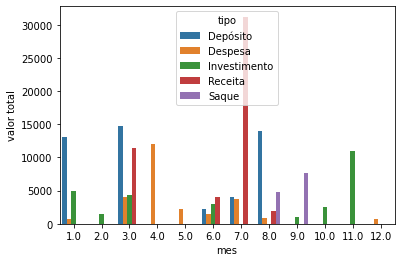

In [ ]:
ax = sns.barplot(x="mes", y="valor total", hue="tipo", data=res)

Relatório 4

Objetivo: Criar um relatório que mostre a quantidade de dinheiro movimentado em cada tipo de transação.

Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query(""" select tipo.cod_tipo,tipo.descricao_tipo as "Tipo de Transação",sum(transacao.valor) as "Valor Transitado" from tipo 
                            left outer join transacao
                            on (transacao.tipo = tipo.cod_tipo)
                            group by tipo.cod_tipo,tipo.descricao_tipo
                            order by tipo.cod_tipo""", conn)
res

,cod_tipo,Tipo de Transação,Valor Transitado
0,1,Saque,17512.00
1,2,Despesa,64102.99
2,3,Investimento,28350.00
3,4,Receita,72241.00
4,5,Depósito,50850.00


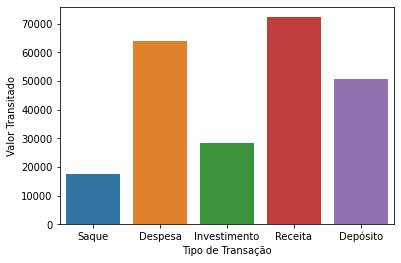

In [ ]:
sns.barplot(x='Tipo de Transação',y='Valor Transitado',data=res)

Relatório 5

Objetivo: Criar um relatório que possa ser visto todas as pessoas cadastradas no sistema junto com seu cpf e mostrar seu saldo de transações, seu saldo de transações consiste na soma de transações do tipo 3, 4 e 5 menos a do tipo 1 e 2, visto que dos 5 tipos de transações temos que a do tipo 1 e 2 são consideradas transações negativas tendo em mente que são gastos.

Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query(""" select pessoa.cpf as cpf, pessoa.nome, sum((case when transacao.tipo = 3 or transacao.tipo = 4 or transacao.tipo = 5 then transacao.valor else -transacao.valor end)) as Saldo
                            from pessoa
                            left outer join transacao
                            on (pessoa.cpf = transacao.cpf_pessoa)
                            group by pessoa.cpf,pessoa.nome 
                            order by pessoa.nome""", conn) 
res

,cpf,nome,saldo
0,33285697412,Alan Federico,NaN
1,1256832166,Alessadra Silva,10450.00
2,10104361234,Ana Gomes,1024.00
3,78952030125,Ana Sofia,2500.00
4,69532561521,Beatriz Souza Alves,-2650.00
5,54123985400,Bernardo Batista,4200.00
6,87412345688,Carla Santos,4400.00
7,21054365830,Debora Fonseca,NaN
8,47345893011,Fabio Nunes,28050.00
9,10201578433,Fernando Magalhaes,-4800.00


Text(0.5, 0, 'saldo')

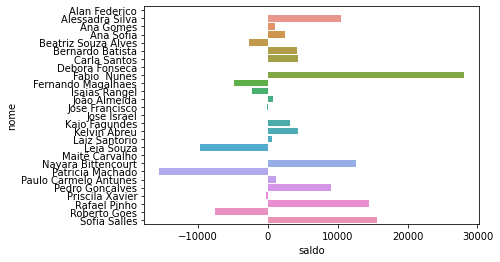

In [ ]:
ax = sns.barplot(x='saldo', y='nome', data=res)
ax.set_xlabel('saldo')